In [6]:
%matplotlib notebook

import matplotlib.pyplot as plt #import matplotlib library
from matplotlib.animation import FuncAnimation # import animations for matplotlib

from datetime import datetime # datetime library

import pandas as pd # pandas library

from sqlalchemy.dialects.postgresql import JSON # Allows SQLAlchemy to parse the json from the postgresql db
from sqlalchemy import ( # Sqlaclhemy desired content
    MetaData,
    Table, Column,
    Integer, Numeric, String,
    DateTime, 
    ForeignKey, 
    Select,
    create_engine) 
from sqlalchemy.orm import sessionmaker # Sqlalchemy ORM desired content
from sqlalchemy.orm.exc import NoResultFound # Sqlalchemy NoResultFound

from time import sleep # sleep

In [7]:
 metadata = MetaData() # Set SQLAlchemy MetaData

In [8]:
# Obtain database password
dbpass = ''
with open('../lunacapture/.dbpass') as f:
    dbpass = f.readlines()

In [9]:
# Create the SQLAlchemy Engine
engine = create_engine('postgresql://postgres:' + dbpass[0] + '@localhost:5432/test_cpp')

In [10]:
# Create the connection to the engine
connection = engine.connect()

In [11]:
# Create a SQLAlchemy Session
Session = sessionmaker(bind = engine)
session = Session()

In [12]:
# Build a SQLAlchemy model of the PostgreSQL database
test_conn = Table('test_conn', metadata,
                  Column('id', Integer(), primary_key=True),
                  Column('instance_num', Integer()),
                  Column('robot_json', JSON),
                  Column('created_at', DateTime(timezone=False), default=datetime.now, onupdate=datetime.now))

In [13]:
# List of possible data points to observe
data_record_names = [
    'boom',
    'drive_encoder_left',
    'drive_encoder_right',
    'dump',
    'epoch_time',
    'fork',
    'loc_angle',
    'loc_x',
    'loc_y',
    'power_boom',
    'power_dump',
    'power_fork',
    'power_left',
    'power_right',
    'power_spin',
    'power_stick',
    'power_tilt',
    'power_tool',
    'spin',
    'state_state',
    'stick',
    'tilt',
    'vibe'
]

In [14]:
sub_plot_0_name = data_record_names[10]
sub_plot_1_name = data_record_names[3]
sub_plot_2_name = data_record_names[19]

In [15]:
print("Sub Plot 1: ", sub_plot_0_name, "\nSub Plot 2: ", sub_plot_1_name, "\nSub Plot 3: ", sub_plot_2_name)

Sub Plot 1:  power_dump 
Sub Plot 2:  dump 
Sub Plot 3:  state_state


In [16]:
# Create an empty pandas dataframe with columns to match
df = pd.DataFrame()

df['id'] = ''
df['instance_num'] = ''
df[sub_plot_0_name] = ''
df[sub_plot_1_name] = ''
df[sub_plot_2_name] = ''
df['datetime_database'] = ''

In [ ]:
def print_data(show_print, results):
    if (!show_print):
        return
    else:
        for result in results:
            print(result[0], ", ", result[1], ", ", result[2][sub_plot_0_name], ", ", result[2][sub_plot_1_name], ", ", result[2][sub_plot_2_name], ", ", result[2])
        return

In [17]:
def retrieve_data(show_print):
    # Prepare to select from the test_conn table
    results = None
    
    if df.empty:
        s = test_conn.select()
        rp = connection.execute(s)
        results = rp.fetchall()
        if (results == None):
            raise SystemExit("The postgresql database is empty.")
        print_data(show_print, results)
    else:
        results = session.query(test_conn).order_by(test_conn.c.id.desc()).first()
        if (results == None):
            raise SystemExit("The postgresql database is empty.")
        print_data(show_print, [results])
        
    # May 20, 2023 - leaving off here
    # To Do: Only collect data from the desire instance_num
    # stop_at_id = df.iloc[-1]['id']
    # results = session.query(test_conn).order_by(test_conn.c.id.desc()).filter_by(test_conn.id > stop_at_id)
        

    # If the dataframe is empty, add this first result 
    if (len(df) == 0):
        # To Do: Lift below into its own function, so as not to repeat
        for result in results:
            df.loc[len(df)] = [result[0], result[1][sub_plot_0_name], result[1][sub_plot_1_name], result[2]]    
    
    # To Do: Change so that all results that are not yet in dataframe are added
    # up to the last one added
    
    # Otherwise, only add if the id in the result is different from the last id in dataframe 
    elif (results[0] != df.iloc[-1]['id']):
        df.loc[len(df)] = [results[0], results[1][sub_plot_0_name], results[1][sub_plot_1_name], results[2]]    

In [47]:
retrieve_data(True)

5850 ,  0.0 ,  0.0 ,  2023-05-15 00:31:44.604783
5851 ,  0.0 ,  0.0 ,  2023-05-15 00:31:45.109984
5852 ,  0.0 ,  0.0 ,  2023-05-15 00:31:45.615021
5853 ,  0.0 ,  0.0 ,  2023-05-15 00:31:46.119688
5854 ,  0.0 ,  0.0 ,  2023-05-15 00:31:46.623877
5855 ,  0.0 ,  0.0 ,  2023-05-15 00:31:47.129096
5856 ,  0.0 ,  0.0 ,  2023-05-15 00:31:47.634164
5818 ,  0.0 ,  0.0 ,  2023-05-15 00:31:28.485150
5819 ,  0.0 ,  0.0 ,  2023-05-15 00:31:28.989446
5820 ,  0.0 ,  0.0 ,  2023-05-15 00:31:29.493172
5821 ,  0.0 ,  0.0 ,  2023-05-15 00:31:29.996647
5822 ,  0.0 ,  0.0 ,  2023-05-15 00:31:30.500185
5823 ,  0.0 ,  0.0 ,  2023-05-15 00:31:31.003693
5824 ,  0.0 ,  0.0 ,  2023-05-15 00:31:31.507161
5825 ,  0.0 ,  0.0 ,  2023-05-15 00:31:32.010672
5826 ,  0.0 ,  0.0 ,  2023-05-15 00:31:32.514129
5827 ,  0.0 ,  0.0 ,  2023-05-15 00:31:33.017871
5828 ,  0.0 ,  0.0 ,  2023-05-15 00:31:33.521505
5829 ,  0.0 ,  0.0 ,  2023-05-15 00:31:34.024528
5830 ,  0.0 ,  0.0 ,  2023-05-15 00:31:34.528308
5831 ,  0.0 ,  0.0 ,

In [48]:
def update_graph_length(graph_initial_cell, graph_x_length):
    if (len(df) > graph_x_length):
        graph_initial_cell = len(df) - graph_x_length
    return graph_initial_cell

<IPython.core.display.Javascript object>


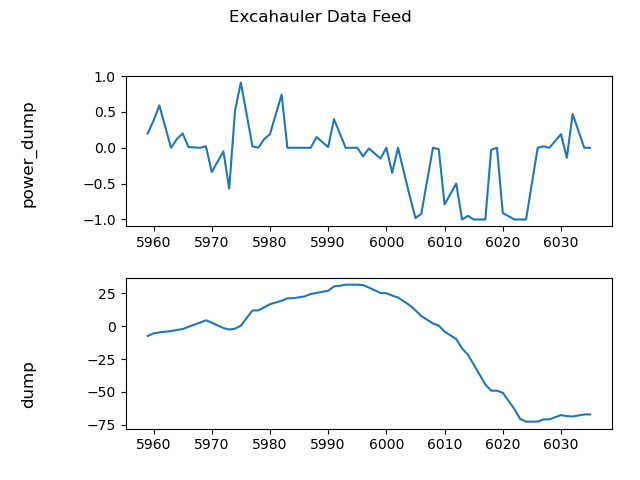

In [49]:
fig, axs = plt.subplots(2)
fig.suptitle("Excahauler Data Feed")
plt.ion()

fig.show()
fig.canvas.draw()

In [50]:
# Initialize the graph starting point at 0
graph_initial_cell = 0

# Set the intended graph length
graph_x_length = 60

In [ ]:
# Endless while loop to display graph
while True:
    retrieve_data(False)
    axs[0].clear()
    axs[1].clear()
    graph_initial_cell = update_graph_length(graph_initial_cell, graph_x_length)
    axs[0].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_0_name])
    axs[1].plot(df.iloc[graph_initial_cell:len(df)]['id'], df.iloc[graph_initial_cell:len(df)][sub_plot_1_name])
    
    axs[0].set_title(sub_plot_0_name, rotation=90, x=-0.2, y=0.1)
    axs[1].set_title(sub_plot_1_name, rotation=90, x=-0.2, y=0.1)
    fig.tight_layout(pad=2.0)
    
    fig.canvas.draw()
    
    sleep(500/1000)
    # clear_output(wait=True)